# Análise de Dados - Previsão de Preços de Imóveis 

## 1 Manipulação dos dados e tratamento de valores missing

In [176]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read para ler os arquivo

df = pd.read_csv('Real estate.csv')

In [4]:
# head para abrir o arquivo
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Com base no dataframe observado, percebe-se que as colunas estão escritas em inglês. Para análise prática, vamos converter
# para PT-BR utilizando a função rename

df = df.rename(columns={'X1 transaction date': 'Data de transação',
                        'X2 house age':'Idade da casa',
                        'X3 distance to the nearest MRT station':'Distância até a estação MRT mais próxima' ,
                        'X4 number of convenience stores': 'Número de lojas de conveniência',
                        'X5 latitude': 'Latitude',
                        'X6 longitude': 'Longitude',
                         'Y house price of unit area': 'Preço da casa da unidade de área'})

In [6]:
# Vamos observar o resultado:

df.head()

,No,Data de transação,Idade da casa,Distância até a estação MRT mais próxima,Número de lojas de conveniência,Latitude,Longitude,Preço da casa da unidade de área
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Agora podemos obter algumas informações como a quantidade de linhas e colunas respectivamente com a função abaixo:

df.shape

(414, 8)

In [8]:
# Podemos obter informações sobre dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   No                                        414 non-null    int64  
 1   Data de transação                         414 non-null    float64
 2   Idade da casa                             414 non-null    float64
 3   Distância até a estação MRT mais próxima  414 non-null    float64
 4   Número de lojas de conveniência           414 non-null    int64  
 5   Latitude                                  414 non-null    float64
 6   Longitude                                 414 non-null    float64
 7   Preço da casa da unidade de área          414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
# Tomemos o describe para obter algumas informações estatísticas como a média e o desvio padrão,contagem, máximo e mínimo 
# dos dados

df.describe()

,No,Data de transação,Idade da casa,Distância até a estação MRT mais próxima,Número de lojas de conveniência,Latitude,Longitude,Preço da casa da unidade de área
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
# Para este caso, vamos utilizar uma função com o objetivo de veirifcar valores missing ou nulos (NaN - Not a Number)

df.isnull().values.any()

False

In [11]:
# Utilizamos a função corr para verificar a correlação entre as variáveis, de modo que isso não implicar 
# necessáriamente causalidade

df.corr()

,No,Data de transação,Idade da casa,Distância até a estação MRT mais próxima,Número de lojas de conveniência,Latitude,Longitude,Preço da casa da unidade de área
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Data de transação,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
Idade da casa,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distância até a estação MRT mais próxima,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Número de lojas de conveniência,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Preço da casa da unidade de área,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


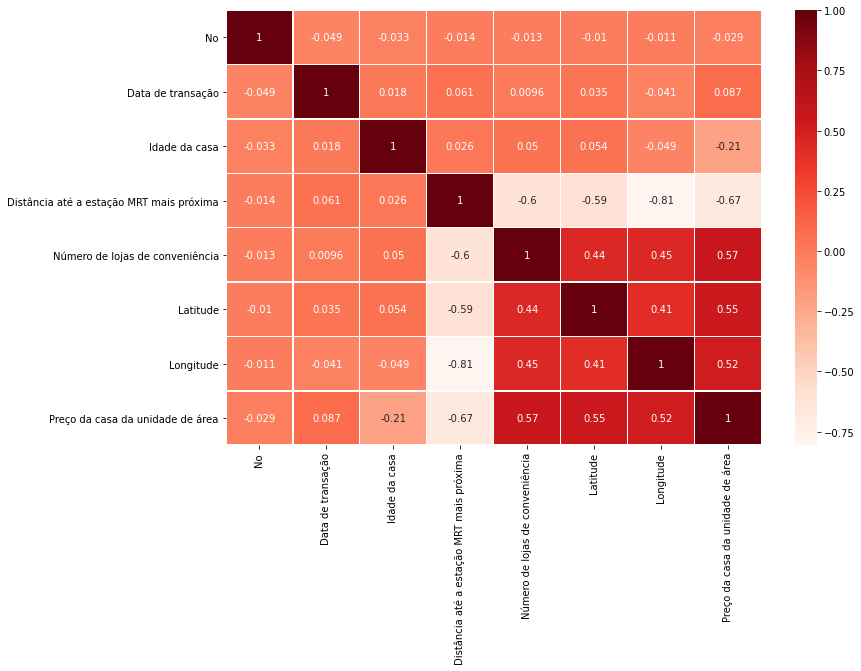

In [12]:
# Para ficar melhor visível, o plot nos ajudará:
# No gráfico de calor, as varíaveis que possuem mais correlação apresentam cor mais forte
# Exemplo: Número de lojas de conveniência possui uma boa correlação com Latitude e Longitude de modo que a idade da casa não tem muita relevância.

fig, ax = plt.subplots(figsize = (12,8))

_ = sns.heatmap(df.corr(), cmap = 'Reds', linewidth = 0.5, annot = True)

In [13]:
# Podemos utilizar o SQL dentro do Pandas também, de modo que as consultas podem ficar mais fáceis. Mas pularemos, nos outros projetos
# tenho algumas consultas simples utlizando SQL

## 2 Início da Análise

In [146]:
# Para este caso, vamos começar colocar nossos dados para treinar, abaixo vai algumas informações:

# Precisamos entender que o ideal é separar nossos dados em treino e teste, de modo 70% dos dados são para treino e 30% são para
#teste. Com Isso, iniciaremos:

from sklearn.model_selection import train_test_split

In [177]:
# Vamos definir os parâmetros, faz sentido eu querer outra coisa além do Preço da casa da unidade de área?
# Logo, teremos:

atributos = ['Número de lojas de conveniência', 'Latitude', 'Longitude', 'Idade da casa','Data de transação']
atrib_prev = ['Preço da casa da unidade de área']

In [178]:
X = df[atributos].values
Y = df[atrib_prev].values

In [179]:
# Definindo os dados para treino em 30, aproximadamente%
split_test_size = 0.3

In [180]:
 X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state =90)  

In [181]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.81% nos dados de treino
30.19% nos dados de teste


####  <font color='Red'>2.1 Aqui temos uma ressalva, é importante perceber que alguns valores podem estar com zeros, de modo isso pode ser relevante quando formos criar os modelos de previsão</font>

- Vejamos, o que não pode ser zero nos valores dos atributos abaixo?





        - Data de transação, Latitude e Longitude. Logo, teremos:

In [200]:
# Veficiação dos valores missing ocultos

df.isnull().values.any()

False

In [201]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing Data de transação: {0}".format(len(df.loc[df['Data de transação'] == 0])))
print("# Linhas missing Latitude: {0}".format(len(df.loc[df['Latitude'] == 0])))
print("# Linhas missing Longitude: {0}".format(len(df.loc[df['Longitude'] == 0])))



# Linhas no dataframe 414
# Linhas missing Data de transação: 0
# Linhas missing Latitude: 0
# Linhas missing Longitude: 0


####  <font color='Red'>2.2 Se tivessemos valores ocultos missing, o ideal seria substituir tais valores pela média dos dados, de modo a obter uma menor taxa de erro.</font>


#### O código abaixo é justamente para isso, vou deixar comentado.

In [184]:
# from sklearn.impute import SimpleImputer

# Vamos criar uma variável para substituir os valores missing ocultos, neste caso, os zeros

# preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados

#X_treino = preenche_0.fit_transform(X_treino)

#X_teste = preenche_0.fit_transform(X_teste)

## 3 Criação do Modelo Machine Learning (ML)

####  <font color='Red'>Utilizaremos o linear regression ou regressão linear por fins práticos</font>

In [185]:
#Importação do sktlearn

In [186]:
from sklearn import linear_model as ln

In [187]:
# Criação do objeto aplicando a função do tipo y = ax + b, onde a:coef.angular e b:coef.linear
model_lr = ln.LinearRegression()
# Colocando o modelo para treinar, utlizando o data set
model_lr.fit(X_treino, Y_treino)

LinearRegression()

In [188]:
# Fazendo as previsões
pred = model_lr.predict(X_teste)

In [189]:
pred[0:10]

array([[44.72543977],
       [32.96607894],
       [40.00056464],
       [16.75025123],
       [46.36114493],
       [23.18424257],
       [40.83273038],
       [40.00056464],
       [32.44666213],
       [49.71259827]])

In [191]:
print("Exatidão (Accuracy): {0:.3f}".format(model_lr.score(X_teste,Y_teste)))

Exatidão (Accuracy): 0.667


In [192]:
# Salvando o modelo para teste

import pickle

In [193]:
# Definindo o nome do arquivo

filename = 'modelo_lr.sav'
pickle.dump(model_lr, open(filename, 'wb')) 

In [199]:
# Testando os dados com os dados teste que foram criados

loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[20].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[4].reshape(1, -1))
print(resultado1)
print(resultado2)

[[39.73919069]]
[[46.36114493]]


## 4 Conclusões

####  <font color='Red'>Para os parâmetros dados, nossa acurácia é de 66,7%;</font>
####  <font color='Red'>O modelo possui algumas limitações porque são poucos dados, de modo que o ideia, neste caso, é usar o SGD Regressor;</font>
####  <font color='Red'>São vastas as aplicabilidades neste caso, por exemplo, uma empresa de imobiliária possa analisar os valores de suas casas, previsão da quantidade de situações como conformidade de tal acontecimento, preços de determinados produtos;</font>
####  <font color='Red'>Outros algoritmos podem ser utilizados como Random Forest ou Naive Bayes;</font>
####  <font color='Red'>Temos uma função do tipo y = ax + b, ou seja, uma função afim, de modo que o algoritmo precisaria de mais dados para aprimorar o coefieciente angular para prever o linear;</font>
####  <font color='Red'>Pode-se criar uma aplicação web para recolher os dados ou algum forms para o programa (que foi salvo) executar suas previsões, com base nos parâmetros utilizados</font>
